## Проект  "Интернет-Магазин"

### Описание проекта

 Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Описание данных

#### Данные для первой части

Файл /datasets/hypothesis.csv. 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

##### Задача

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

#### Данные для второй части

Файл /datasets/orders.csv.
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

##### Задача

Проанализируйте A/B-тест:

* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

<div class="alert alert-block alert-success">
    
<b>Комментарий от ревьюера</b> 
    
Хорошо, что во вступительной части ты указываешь всю важную информацию о проекте.
</div>

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

<div class="alert alert-block alert-success">
    
<b>Комментарий от ревьюера</b> 
    
Все нужные библиотеки загружены, отлично.
</div>

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 200)

## Выгрузка и обзор данных

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


### Вывод:

* Видим что количество Гипотез 9 и оценены по 0-10 бальной шкале.
* Пользователи разделены на 2 группы A и В.
* Необходимо провести небольшую предобработку данных:
    * Привести дату к нужному типу,
    * Привести наименование столбцов к удобному формату для работы.

<div class="alert alert-block alert-success">
    
<b>Комментарий от ревьюера</b> 
    
Всё верно, можно переходить к предобработке.
</div>

## Предобработка данных

### Таблица Hypothesis

In [7]:
hypothesis.info()
hypothesis.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [8]:
hypothesis.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

In [9]:
hypothesis.columns = hypothesis.columns.str.lower()

In [10]:
hypothesis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [11]:
hypothesis.duplicated().sum()

0

In [12]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что делаешь проверку на пропуски и дубликаты.
</div>

### Таблица Orders

In [13]:
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [14]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [15]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = pd.to_datetime(orders['date'])

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [17]:
orders.duplicated().sum()

0

In [18]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

### Таблица Visitors

In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
visitors['date'] = pd.to_datetime(visitors['date'])

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, здесь нужно поменять формат даты.
</div>

In [21]:
visitors.duplicated().sum()

0

In [22]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Вывод:

* Привели наименование столбцов и тип данных в нужный формат для работы,
* Так же проверили данные на наличие пропусков и дубликатов.

## Первая часть

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [24]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE',ascending = False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Молодец, что отредактировал таблицу, теперь можно легко сравнить гипотезы. 

</div>

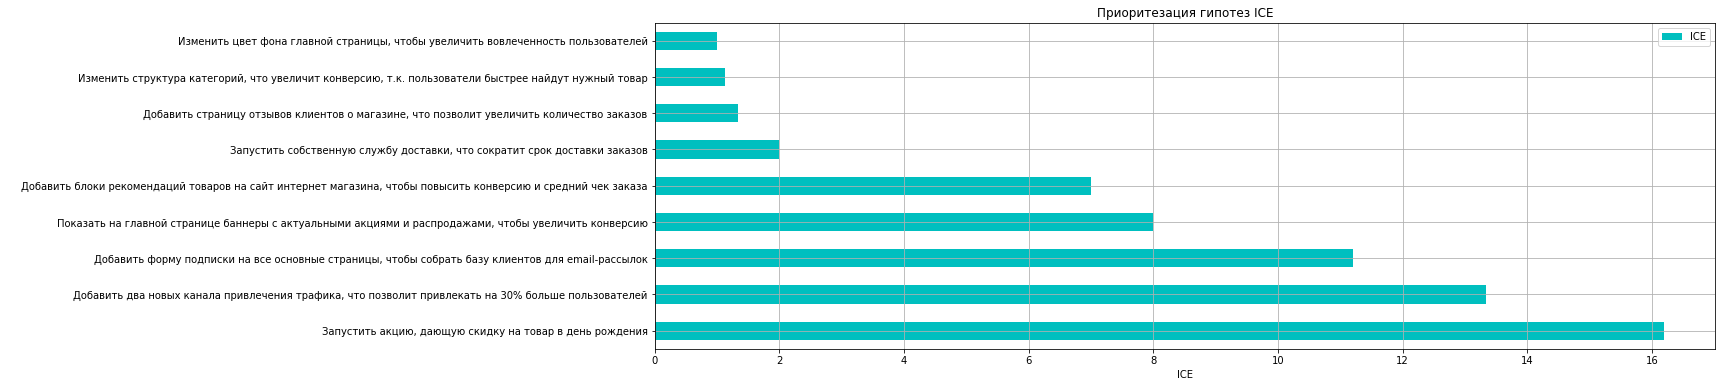

In [25]:
hypothesis[['hypothesis', 'ICE']].set_index('hypothesis')\
                                .sort_values('ICE',ascending = False)\
                                .plot(kind = 'barh',grid = True,color = 'c',figsize = (19,6))
plt.title('Приоритезация гипотез ICE')
plt.ylabel(' ')
plt.xlabel('ICE')
plt.show()

Наиболее перспективные гипотезы по ICE 

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [26]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймворков - так различия в их работе максимально наглядны.
</div>

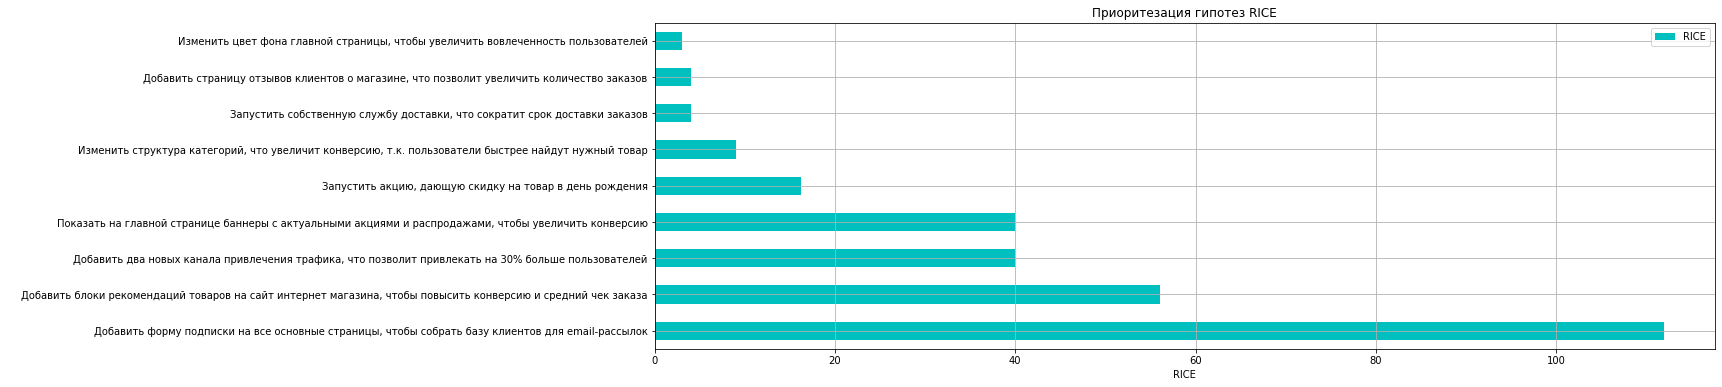

In [27]:
hypothesis[['hypothesis','RICE']].set_index('hypothesis')\
                                .sort_values('RICE',ascending = False)\
                                .plot(kind = 'barh',grid = True,color = 'c',figsize = (19,6))
plt.title('Приоритезация гипотез RICE')
plt.ylabel(' ')
plt.xlabel('RICE')
plt.show()

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

In [28]:
hypothesis.sort_values(by = 'RICE',ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Согласно анализу по фреймворку ICE, более переспективные гипотезы :
* Запустить акцию, дающую скидку на товар в день рождения,
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

А после анализа по фреймворку RICE:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
* Запустить акцию, дающую скидку на товар в день рождения.

Различия в данных формулах в том что RICE учитывает количество пользователей, которых затронет данная гепотеза.

Гипотезы остались те же, но изменился порядок приоритета. Видим что гипотеза "Запустить акцию, дающую скидку на товар в день рождения." по ICE была на первом месте а по RICE на 5, это в связи с тем что Охват пользователей равен - 1 баллу, и я думаю можно исключить данную гепотезу из переспективных гипотез.

Таким образом, более перспективные гепотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера 2</b> 
    
Здорово, теперь в выводе есть все что нужно.
</div>

## Вторая часть

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

In [29]:
dateGroup = orders[['date', 'group']].drop_duplicates()

ordersAgg = dateGroup.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAgg = dateGroup.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [30]:
cumulativeData = ordersAgg.merge(visitorsAgg,left_on = ['date','group'],right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<div class="alert alert-info">
    
готово
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера 2</b> 
    
Теперь таблица получилась верная.
</div>

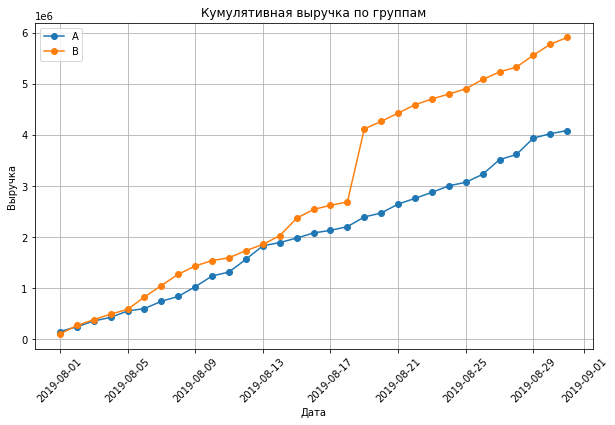

In [31]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize = (10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A',marker = 'o')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B',marker = 'o')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

На графике видно что у группы В есть отклонения(возможно аномалии), а у группы А растет равномерно.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, скачок в группе B может быть связан с аномалиями.
</div>

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

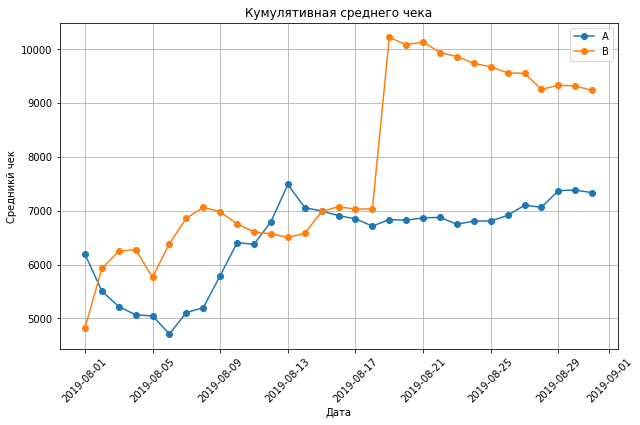

In [32]:
plt.figure(figsize = (10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', marker = 'o')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', marker = 'o')
plt.title('Кумулятивная среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средникй чек')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

В группе А был не большой скачок 13.08.2019 по средним чекам и остановился примерно на том же уровне, а в группе В был значительный скачок 19.08.2019 но со временем немного шел на понижение но в целом уровень оставался больше чем у группы А.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Да, резкий рост происходит в ту же дату, что и на предыдущем графике.
</div>

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

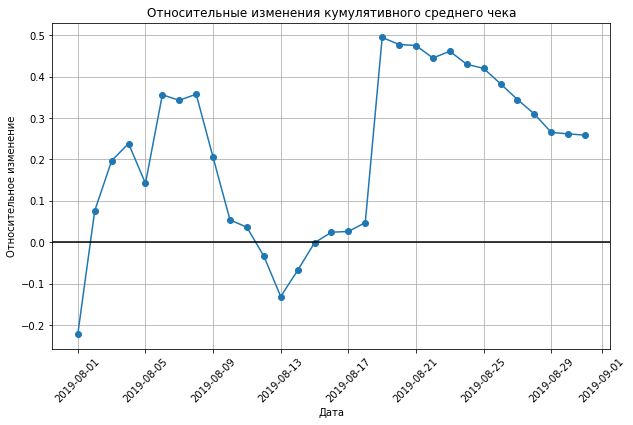

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', \
                                                   right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (10,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,marker = 'o')
plt.axhline(y=0, color = 'black')
plt.title('Относительные изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Здесь виден большой скачок продаж 19.08.2019, с чем это связано пока не известно, возможно это связано с крупными заказами.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

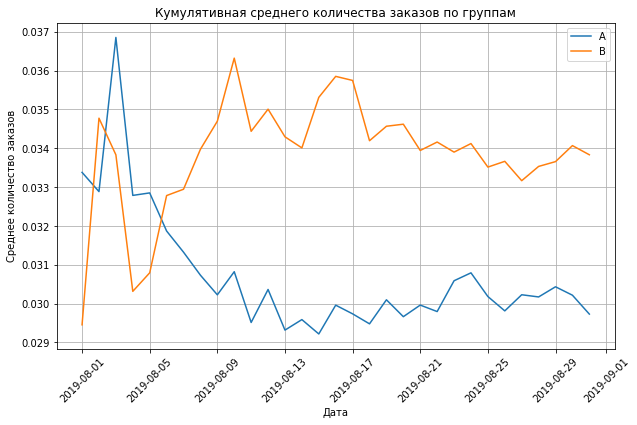

In [34]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize = (10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.title('Кумулятивная среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Кумулятивная среднего количества заказов по группам не сильно отличается друг от друга, но у группы В немного лучше.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

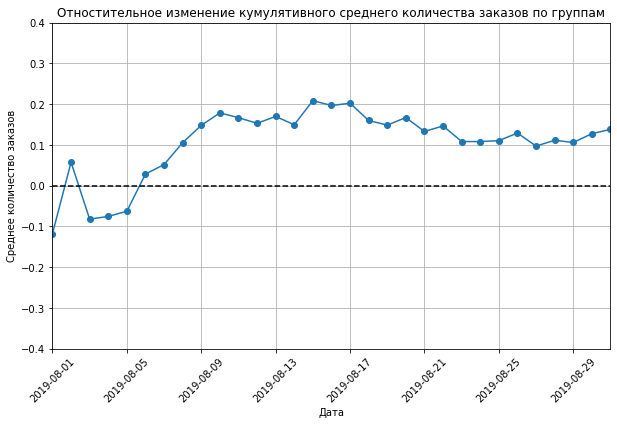

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']],\
left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A','B'])

plt.figure(figsize = (10,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, marker = 'o')
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), -0.4, 0.4]) 
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Отностительное изменение кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Кумулятивная среднего количества заказов у группы В лучше.Рост начинается примерно со 06.08.2019.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [36]:
ordersByUsers = orders.groupby('visitor_id', as_index = False).agg({'transaction_id': 'nunique'})

ordersByUsers.columns = ['visitor_id','transaction_id']
ordersByUsers .sort_values(by = 'transaction_id', ascending = False)

,visitor_id,transaction_id
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


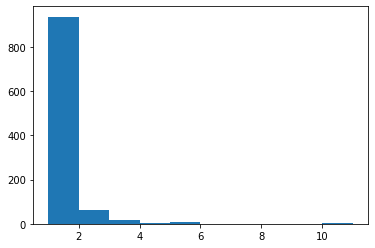

In [37]:
plt.hist(ordersByUsers['transaction_id'])
plt.show()

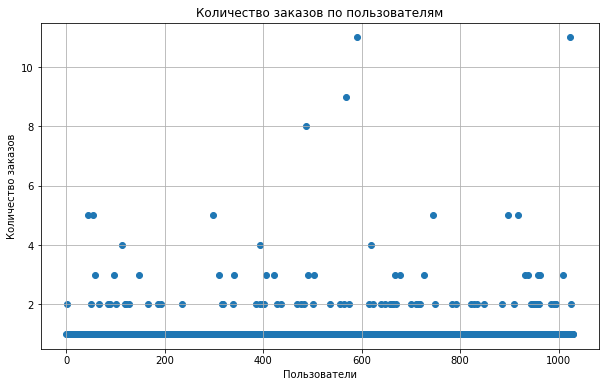

In [38]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize = (10,6))
plt.scatter(x = x_values, y = ordersByUsers['transaction_id'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

Основное количество заказов у пользователей от 2 до 4, но есть пользователи у которых больше 10 заказов.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [39]:
per_t = np.percentile(ordersByUsers['transaction_id'], [95,99])
per_t

array([2., 4.])

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [40]:
orders.sort_values(by='revenue', ascending=False)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
...,...,...,...,...,...
933,3760662696,3577713868,2019-08-27,60,B
459,863448794,2738601405,2019-08-19,50,B
756,125335873,3423937755,2019-08-30,50,B
584,1126146019,2705308997,2019-08-20,50,A


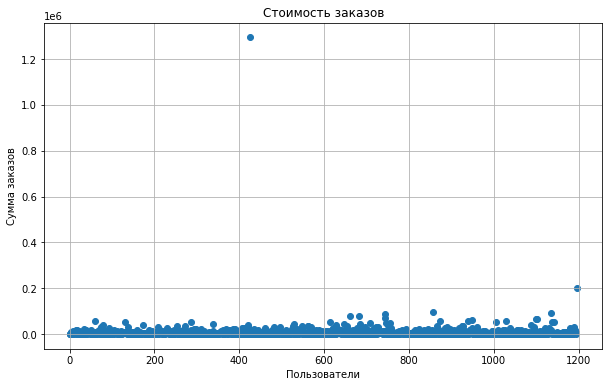

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize = (10,6))
plt.scatter(x  = x_values, y = orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказов')
plt.grid(True)
plt.show()

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [42]:
per_o = np.percentile(orders['revenue'],[95,99])
per_o

array([28000. , 58233.2])

In [43]:
max_revenueA = orders[orders['group'] == 'A']['revenue'].max()
max_revenueA

93940

In [44]:
max_revenueB = orders[orders['group'] == 'B']['revenue'].max()
max_revenueB

1294500

95% пользователей осуществили не больше 2 заказов и 99% пользователей осуществили не более 4 заказов, тем самым все что выше 2 - 3 заказов и кто совершил заказ не более 58 233.2 рубля, можно считать аномалиями. Так же мы видим что в группе А сумма максимального чека не более 93 940 рублей, в то время у группы В 1 294 500 рубля.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Такое определение выбросов для количества заказов корректно.
</div>

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [45]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [46]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [47]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [48]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [49]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [50]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

In [51]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

In [52]:
[ordersByUsersA['orders'],pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum()\
                                                         -len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index = \
np.arange(data['visitorsPerDateA'].sum()- len(ordersByUsersA['orders'])),name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index = \
np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name = 'orders')], axis = 0)

alpha = 0.05 критический уровень статистической значимости

В данном тесте мы будем использовать метод st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»). Данный метод подходит подходит для данных при малом количестве выбросов а также для сравнения двух выборок.

- H0: 'Статистически значимых различий в среднем количестве заказов между группами нет'
- H1: 'Статистически значимые различия есть'

<div class="alert alert-info">
    
готово
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Всё верно получилось, так сразу понятна суть расчета.
</div>

In [53]:
print('Значение p_value:',
      "{0:.2f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие конверсии между группами :',
      "{0:.3f}".format(sampleB.mean()/ sampleA.mean()-1))

Значение p_value: 0.02
Относительное различие конверсии между группами : 0.138


Так как значение p_value - 0.02 меньше alpha - 0.05, то нулевую гепотезу 'Статистически значимых различий в среднем количестве заказов между группами нет' - отвергаем. Так же имеется различие между группой А и В, где группа В преобладает в конверсии группу А на 13,8%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

- H0: 'Статистически значимых различий в среднем чеке заказа между группами нет'
- H1: 'Статистически значимые различия есть'

In [54]:
print('Значение p_value:'
    "{0:.3f}".format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] =='B']['revenue'])[1]))
print('Относительное различие среднего чека между группами:',
      "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

Значение p_value:0.729
Относительное различие среднего чека между группами: 0.259


Так как значение p_value - 0.729 больше alpha - 0.05, то нулевую гепотезу 'Статистически значимых различий в среднем чеке заказа между группами нет' - не отвергаем. Так же группа В преобладает в среднем чеке группу А на 25,9%

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [55]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > per_t[0]]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > per_t[0]]['visitor_id']
    ], axis = 0
)

usersWithExpensiveOrders = orders[orders['revenue'] > per_o[1]]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)



In [56]:
sampleFiltered = pd.concat(
    [
      ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
        ), name = 'orders'
)
    ],axis = 0
)
sampleAFiltered = pd.concat(
    [
      ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
        ), name = 'orders'
)
    ],axis = 0
)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 



- H0: 'Статистически значимых различий в среднем количестве заказов между группами нет'
- H1: 'Статистически значимые различия есть'

In [57]:
print('p_value:', "{0:.3f}".format(st.mannwhitneyu(sampleAFiltered,sampleBFiltered)[1]))
print('Относительное различие между группами:',"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value: 0.010
Относительное различие между группами: 0.174


Так как значение p_value - 0.01 меньше alpha - 0.05, то нулевую гепотезу 'Статистически значимых различий в среднем количестве заказов между группами нет' - отвергаем. Так же имеется различие между группой А и В, где группа В преобладает в среднем количестве заказов группу А на 17,4% что на 3.6% больше чем по сырым данным.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, при анализе "очищенных данных" p-value стало еще меньше и все так же меньше 0.05, следовательно, между группами есть статистически значимые различия.
</div>

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

- H0: 'Статистически значимых различий в среднем чеке заказа между группами нет'
- H1: 'Статистически значимые различия есть'

In [58]:
print('p_value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print('Относительное различие между группами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p_value: 0.798
Относительное различие между группами: -0.020


Так как значение p_value - 0.729 ,больше alpha - 0.05, то нулевую гепотезу 'Статистически значимых различий в среднем чеке заказа между группами нет' - не отвергаем. Так же имеется различие между группой А и В, где группа В ниже в среднем чеке группу А на 2%. Учитывая что по сырым данным, группа В преобладала группы А в среднем чеке на 25,9%, то можно считать что такая разница возникла из-за аномальной продажи - на сумму 1 294 000 рублей.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, здесь видно, как на относительные различия повлияли выбросы.
</div>

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

И так что мы выяснили после проведения А/В тестов по имеющимся данным:

- По "сырым" данным, группа В преобладает в конверсии группу А на 13,8%.
- По "сырым" данным, группа В преобладает в среднем чеке группу А на 25,9%.
- По "очищенным" данным, группа В преобладает в среднем количестве заказов группу А на 17,4% что на 3.6% больше чем по сырым данным.
- По "очищенным" данным,группа В ниже в среднем чеке группу А на 2%, что впринципе разница та большая, учитывая что по сырым данным она преобладала на 25.9%.

По результатам проведенного анализа, прдполагаю остановить тест и зафиксировать победу группы В, так как практически по всем параметрам она превосходит группу А даже после удаления аномалий.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Верно, данных для принятия решения у нас уже достаточно. 
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Спасибо, что учел мои комментарии. Ты приложил много усилий, чтобы довести проект до конца, надеюсь, что эта работа помогла тебе лучше понять теорию. Я принимаю проект и желаю удачи в прохождении курса!

</div>